In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

<Axes: >

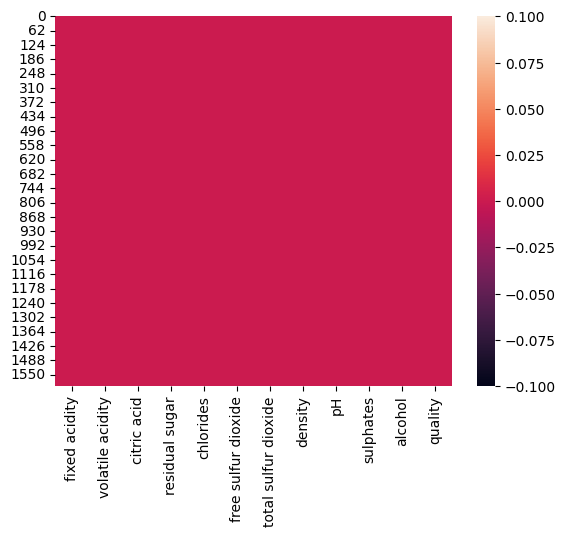

In [ ]:
sns.heatmap(df.isnull())

<Axes: >

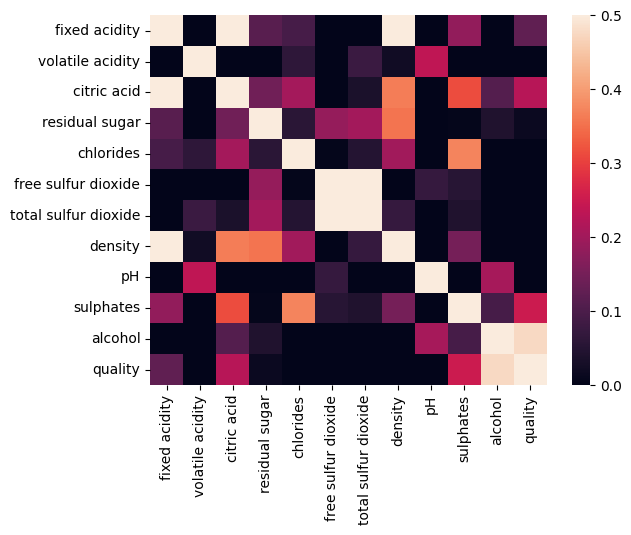

In [ ]:
sns.heatmap(df.corr(), vmin = 0, vmax = 0.5)

In [ ]:
df = df.drop_duplicates()

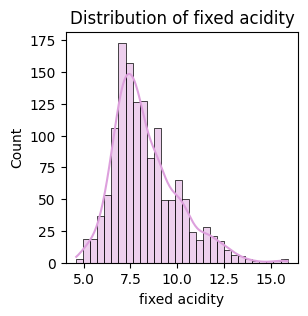

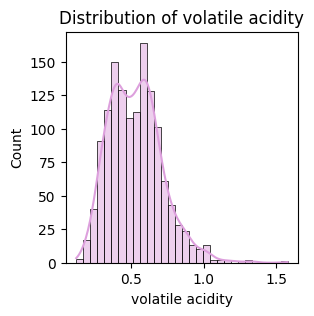

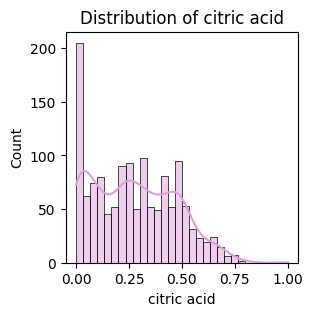

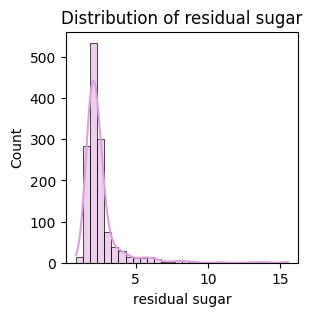

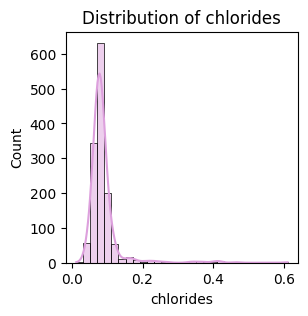

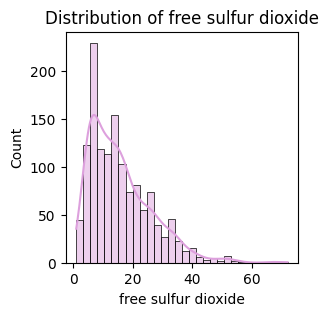

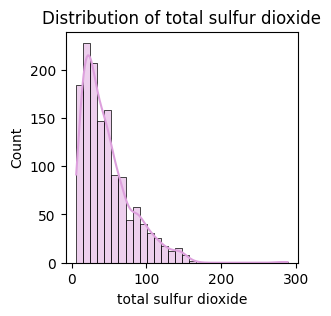

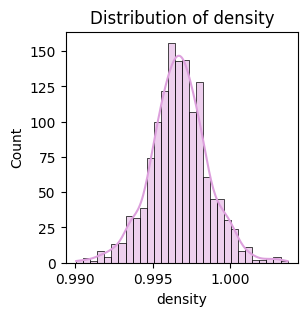

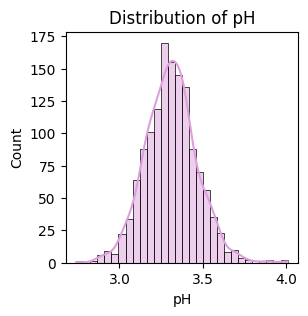

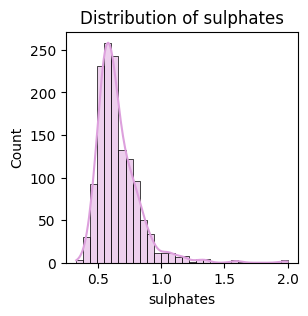

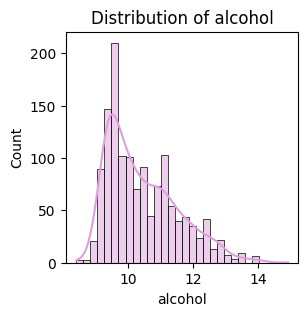

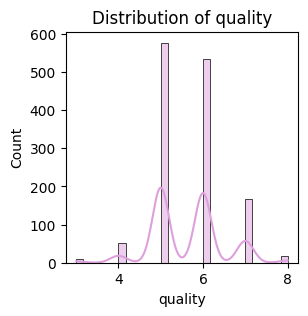

In [ ]:
for column in df:
    plt.figure(figsize=(3, 3))
    sns.histplot(data=df, x=column, kde=True, bins=30, color='#DDA0DD')
    plt.title(f'Distribution of {column}')
    plt.show()

Comparing each attribute with 'quality'

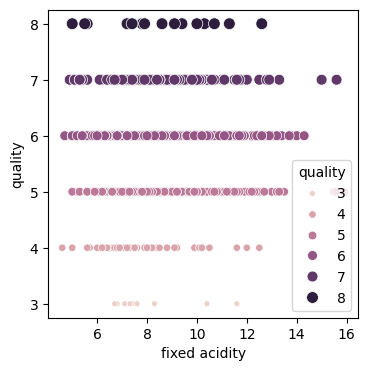

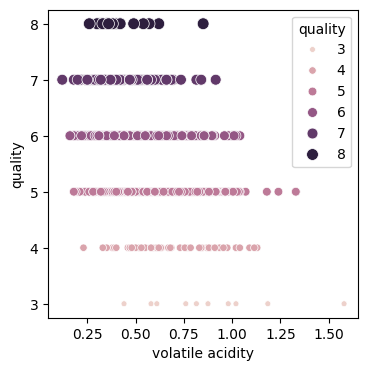

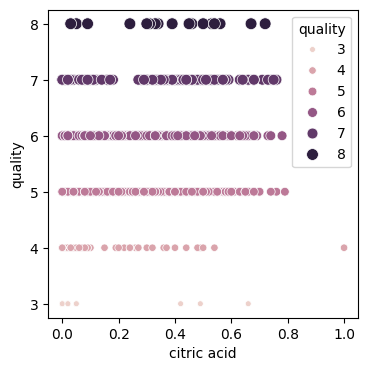

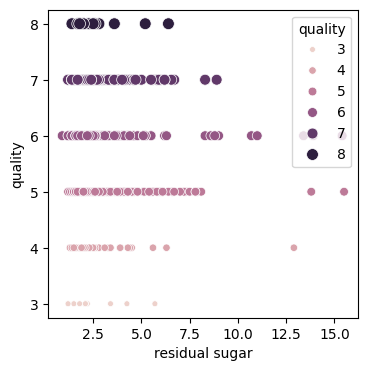

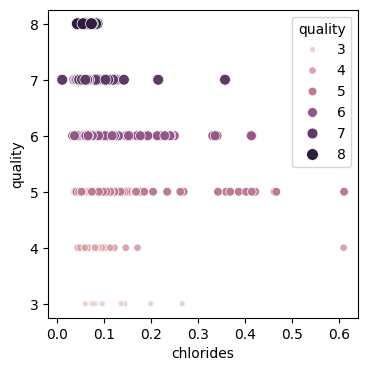

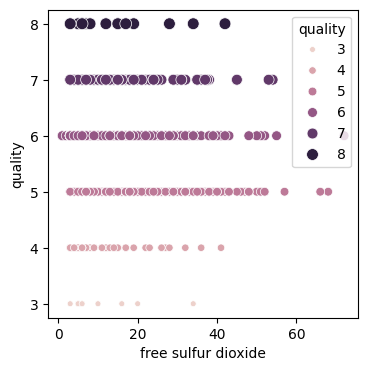

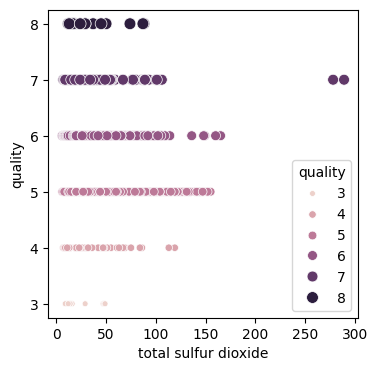

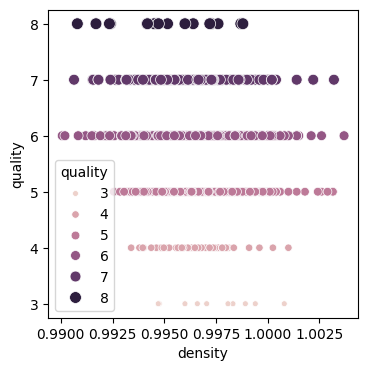

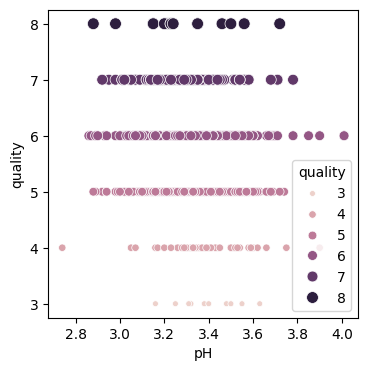

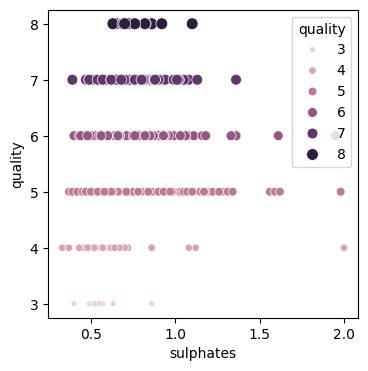

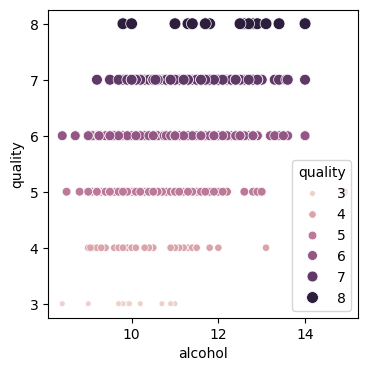

In [ ]:
 for column in df.columns[:-1]:
     plt.figure(figsize = (4,4))
     sns.scatterplot(data = df, x = column, y = 'quality', hue = 'quality', size = 'quality')
     plt.show()

Do sweeter wines receive better ratings?

Average quality of wines with low sugar 5.624489795918367
Average quality of wines with high sugar 5.620052770448549


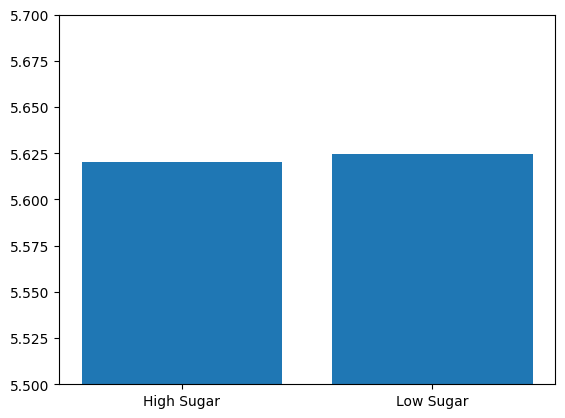

In [ ]:
mean_sugar = df['residual sugar'].mean()
meanofhighsugar = df[df['residual sugar'] > mean_sugar].quality.mean()
meanoflowsugar = df[df['residual sugar'] < mean_sugar].quality.mean()

print("Average quality of wines with low sugar", meanoflowsugar)
print("Average quality of wines with high sugar", meanofhighsugar)

plt.bar(x = ['High Sugar', 'Low Sugar'], height = [meanofhighsugar, meanoflowsugar])
plt.ylim((5.5,5.7))
plt.show()

There is a close competition between sweet and less sweet wines

What level of acidity receives the highest average rating?


Average quality of wines with low acidity 5.541463414634146
Average quality of wines with high acidity 5.747680890538033


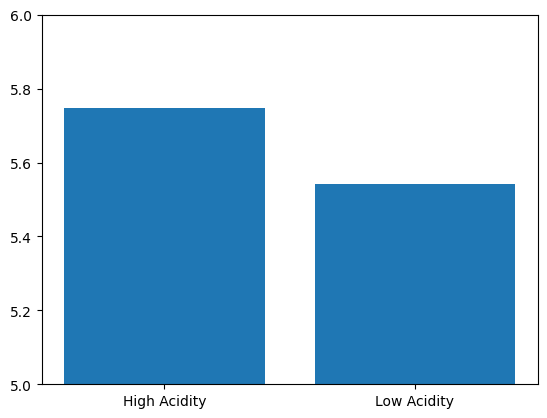

In [ ]:
mean_acidity = df['fixed acidity'].mean()
meanofhighalc = df[df['fixed acidity'] > mean_acidity].quality.mean()
meanoflowalc = df[df['fixed acidity'] < mean_acidity].quality.mean()

print("Average quality of wines with low acidity", meanoflowalc)
print("Average quality of wines with high acidity", meanofhighalc)

plt.bar(x = ['High Acidity', 'Low Acidity'], height = [meanofhighalc, meanoflowalc])
plt.ylim((5, 6))
plt.show()

Wines with a slight more acidity tend to have better rating

Which wines are produced more? (according to quality)

<Axes: xlabel='Quality', ylabel='quantity'>

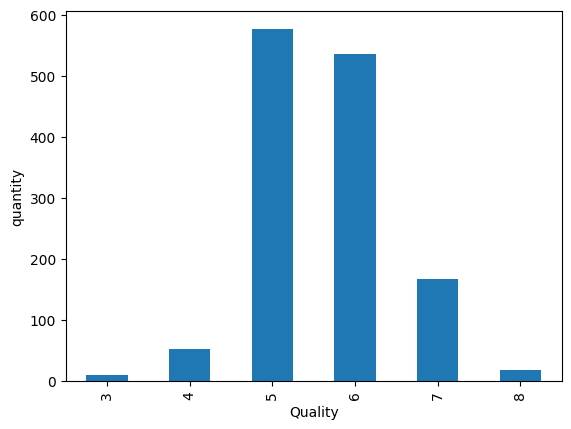

In [ ]:
df['quality'].value_counts().sort_index().plot(kind='bar', xlabel='Quality', ylabel='quantity')

In [ ]:
print(df.quality.mean())

5.6232523914643116


Converting data to binary classification


In [ ]:
df["quality"] = np.where(df["quality"] > 6, 1, 0)

In [ ]:
df.quality.value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

# Model Creation and Training

In [ ]:
models = ['Logistic Regression', 'KNN Classifier', 'Decision Tree', 'Random forest', 'ANN']

In [ ]:
scores = []

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('quality', axis = 1), df['quality'], test_size = 0.25, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1019, 11) (340, 11) (1019,) (340,)


Scaling the data

In [ ]:
Y_train.value_counts()

quality
0    879
1    140
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression();
logreg.fit(scaled_X_train, Y_train)

LogisticRegression()

In [ ]:
lg_pred = logreg.predict(scaled_X_test);

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
classififcation_report = classification_report(Y_test, lg_pred)
print(confusion_matrix(Y_test, lg_pred))
print(classififcation_report)
accuracy = accuracy_score(Y_test, lg_pred)
print("Accuracy Score = " ,accuracy)


[[286  10]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       296
           1       0.64      0.41      0.50        44

    accuracy                           0.89       340
   macro avg       0.78      0.69      0.72       340
weighted avg       0.88      0.89      0.88       340

Accuracy Score =  0.8941176470588236


In [ ]:
scores.append(accuracy)

KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn_model.fit(scaled_X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn_model.predict(scaled_X_test)

In [ ]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       296
           1       0.53      0.43      0.48        44

    accuracy                           0.88       340
   macro avg       0.72      0.69      0.70       340
weighted avg       0.87      0.88      0.87       340



In [ ]:
#Elbow Method

In [ ]:
error_rates = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaled_X_train, Y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rates.append(1-accuracy_score(Y_test, pred_i))

print(min(error_rates), error_rates.index(min(error_rates)))

0.08529411764705885 9


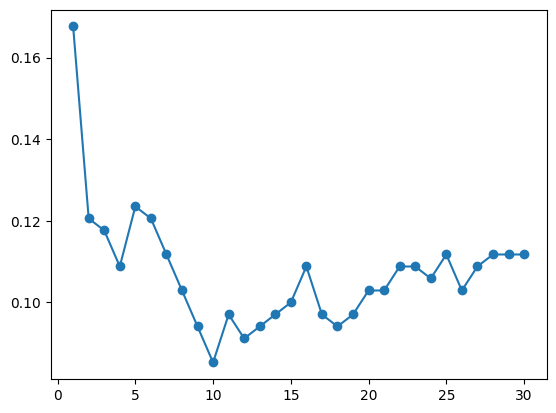

In [ ]:
plt.plot(range(1,31), error_rates, marker = 'o')

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = error_rates.index(min(error_rates)))
knn_model.fit(scaled_X_train, Y_train)
knn_pred = knn_model.predict(scaled_X_test)
print(accuracy_score(Y_test, knn_pred))


0.9058823529411765


In [ ]:
scores.append(accuracy_score(Y_test, knn_pred))

In [ ]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       296
           1       0.70      0.48      0.57        44

    accuracy                           0.91       340
   macro avg       0.81      0.72      0.76       340
weighted avg       0.90      0.91      0.90       340



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier()
model_dtree.fit(scaled_X_train, Y_train)
dtree_pred = model_dtree.predict(scaled_X_test)
print(classification_report(Y_test, dtree_pred))


              precision    recall  f1-score   support

           0       0.92      0.89      0.90       296
           1       0.38      0.45      0.42        44

    accuracy                           0.84       340
   macro avg       0.65      0.67      0.66       340
weighted avg       0.85      0.84      0.84       340



In [ ]:
scores.append(accuracy_score(Y_test, dtree_pred))
print(scores)

[0.8941176470588236, 0.9058823529411765, 0.8352941176470589]


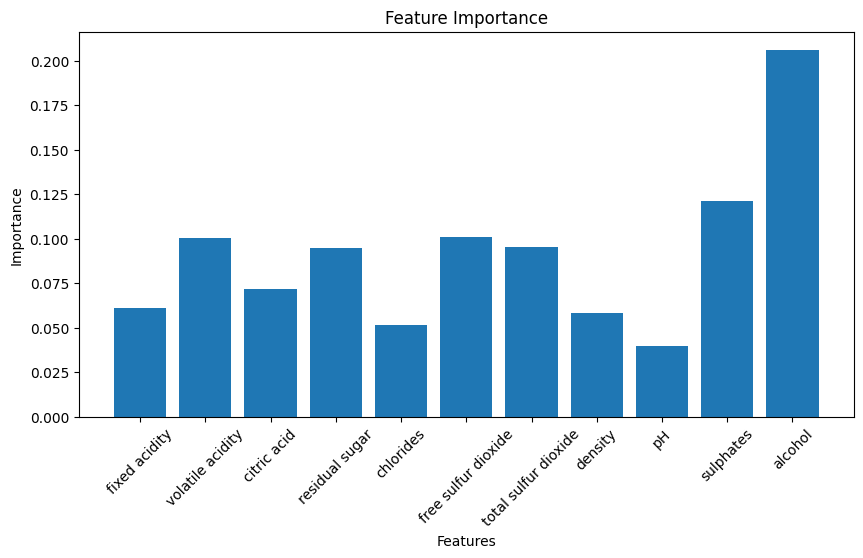

In [ ]:
# model_dtree.feature_importances_
plt.figure(figsize = (10, 5))
plt.bar(df.columns[:-1], model_dtree.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation = 45)
plt.show()

Alcohol has the highest importance in determining quality of the wine

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_features = 3, n_estimators = 169, bootstrap = True)
rfc.fit(scaled_X_train, Y_train)
rfc_pred = rfc.predict(scaled_X_test)
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       296
           1       0.70      0.36      0.48        44

    accuracy                           0.90       340
   macro avg       0.80      0.67      0.71       340
weighted avg       0.88      0.90      0.88       340



In [ ]:
scores.append(accuracy_score(Y_test, rfc_pred))
print(scores)

[0.8941176470588236, 0.9058823529411765, 0.8352941176470589, 0.8970588235294118]


ANN


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model_history=nn_model.fit(scaled_X_train,Y_train,epochs=500,batch_size=32,validation_split=0.2)

Epoch 1/500
26/26 [==============================] - 3s 16ms/step - loss: 0.6199 - accuracy: 0.7448 - val_loss: 0.5042 - val_accuracy: 0.8578
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.8638 - val_loss: 0.3908 - val_accuracy: 0.8578
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 0.3381 - accuracy: 0.8638 - val_loss: 0.3595 - val_accuracy: 0.8578
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.8638 - val_loss: 0.3437 - val_accuracy: 0.8578
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 0.2829 - accuracy: 0.8687 - val_loss: 0.3431 - val_accuracy: 0.8480
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 0.2727 - accuracy: 0.8798 - val_loss: 0.3427 - val_accuracy: 0.8775
Epoch 7/500
26/26 [==============================] - 0s 6ms/step - loss: 0.2648 - accuracy: 0.8785 - val_loss: 0.3433 - val_accuracy: 0.8775
Epoch 8/500


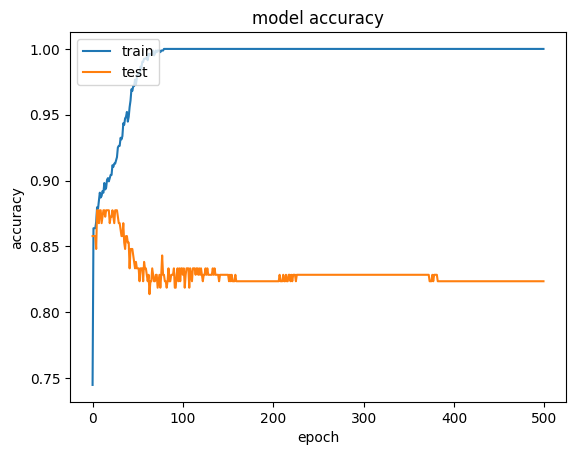

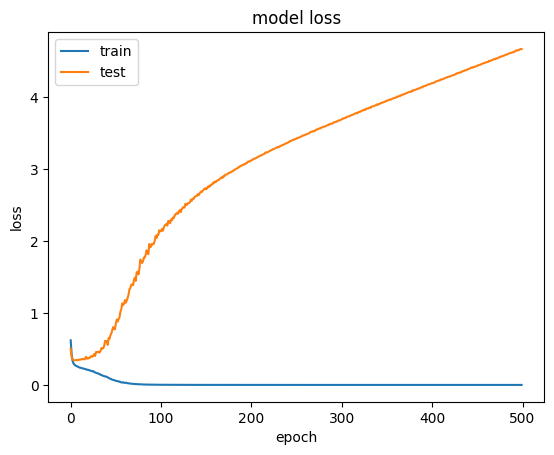

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=nn_model.predict(X_test)
y_pred=(y_pred>0.5)

11/11 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

print(classification_report(Y_test,y_pred))

0.8764705882352941
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       296
           1       1.00      0.05      0.09        44

    accuracy                           0.88       340
   macro avg       0.94      0.52      0.51       340
weighted avg       0.89      0.88      0.82       340



In [ ]:
scores.append(accuracy_score(Y_test, y_pred))
print(scores)

[0.8941176470588236, 0.9058823529411765, 0.8352941176470589, 0.8970588235294118, 0.8764705882352941]


In [ ]:
for i in range(len(scores)):
    scores[i] = round(scores[i]*100, 2)
print(scores)

[89.41, 90.59, 83.53, 89.71, 87.65]


In [ ]:
res = pd.DataFrame({'Model': models, 'Accuracy': scores})
res.set_index('Model', inplace = True)
res

,Accuracy
Model,
Logistic Regression,89.41
KNN Classifier,90.59
Decision Tree,83.53
Random forest,89.71
ANN,87.65


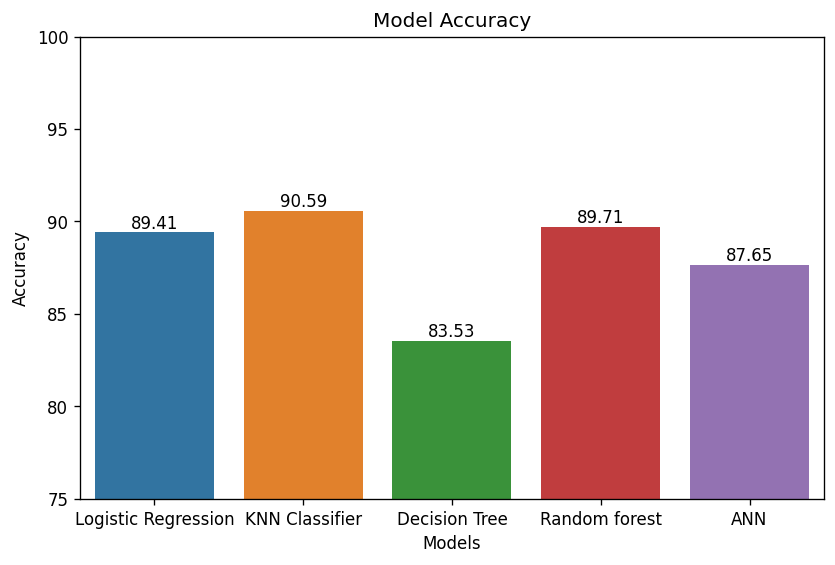

In [ ]:
plt.figure(figsize = (8, 5), dpi = 120)
ax = sns.barplot(x = models, y = scores, hue = models, data = res, err_kws={'linewidth': 0});
plt.ylim(75,100)
plt.title('Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

The best Machine Learning Model for this data set is - KNN Classifier